# Introduction aux copules 


In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
sns.set_theme(style="whitegrid")

import numpy as np
from scipy.stats import norm, \
    beta, cauchy, expon, rayleigh, uniform
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Théorème de Sklar

$$ H(x,y) = C(F(x), G(y)) $$
$$ x = F^{-1}(u) $$
$$ y = G^{-1}(v) $$
$$ C(u,v) = H(F^{-1}(u), G^{-1}(v)) $$

**Résumé :** Le théorème de Sklar indique que toute loi de probabilité jointe  H(x,y)  peut être exprimée comme une copule  C  appliquée aux fonctions de répartition marginales  F  et  G .  
On peut aussi reconstruire les valeurs originales à partir des uniforms (u,v) via les inverses de F et G.


### Propriétés des copules

$$ C(u,0) = C(0,v) = 0 $$
$$ C(u,1) = u $$
$$ C(1,v) = v $$
$$ C(u_2,v_2) - C(u_2,v_1) - C(u_1,v_2) + C(u_1,v_1) \geq 0 $$

**Résumé :** Ces relations définissent les propriétés fondamentales qu’une copule \( C \) doit respecter :  
- Valeur nulle si l’un des arguments est nul.  
- Restitution des marges lorsque l’autre argument vaut 1.  
- La dernière inégalité exprime la 2-incrémentabilité, garantissant que \( C \) est une fonction de répartition jointe valide.


### Bornes de Fréchet-Hoeffding

$$ M(u,v) = \min(u,v) $$
$$ W(u,v) = \max(u+v-1, 0) $$
$$ W(u,v) \leq C(u,v) \leq M(u,v) $$

**Résumé :** Les bornes de Fréchet-Hoeffding encadrent toute copule \( C \) entre deux limites extrêmes :  
- M(u,v)  correspond à la dépendance parfaite positive (copule de Fréchet supérieure).  
-  W(u,v)  correspond à la dépendance parfaite négative (copule de Fréchet inférieure).

### Copule d’indépendance

$$ \Pi(u,v) = u \times v $$

**Résumé :** La copule d’indépendance modélise le cas où les deux variables aléatoires sont indépendantes, produisant un produit simple de leurs coordonnées uniformes.


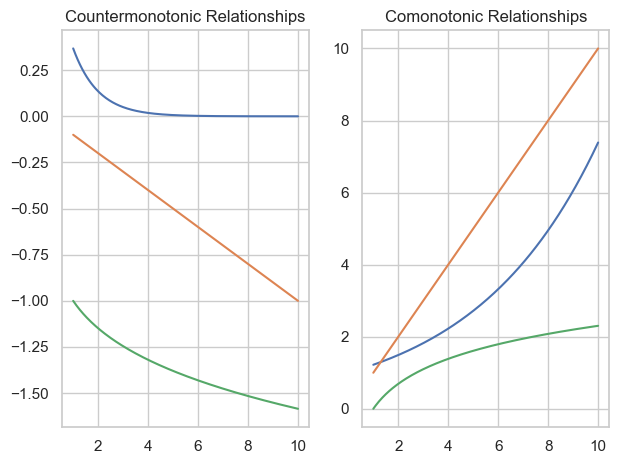

In [5]:
plt.figure()
x = np.linspace(1,10,200)

plt.subplot(1,2,1)
y = np.exp(-x)
plt.plot(x,y)
plt.plot(x,-0.1*x)
plt.plot(x, -x**(0.2))
plt.title('Countermonotonic Relationships')

plt.subplot(1,2,2)
plt.plot(x,np.exp(0.2*x))
plt.plot(x,x)
plt.plot(x,np.log(x))
plt.title('Comonotonic Relationships')

plt.tight_layout()



- Illustration graphique de deux structures extrêmes de dépendance.  
- Antimonotone (gauche) : variation inverse des variables.  
- Comonotone (droite) : variation conjointe des variables.


### Densité de copule

$$ h(x,y) = c(F(x),G(y)) \, f(x) \, g(y) $$

  
- Relie la densité jointe h(x,y) à la densité de copule c(u,v)\ et aux densités marginales f(x), g(y).  
- Montre que la dépendance entre X et Y est entièrement contenue dans c, les marges décrivant uniquement le comportement univarié.


In [7]:
# Matrice de corrélation avec forte dépendance positive
P = np.asarray([
    [1, 0.99],
    [0.99, 1]
])

# Dimension du vecteur aléatoire
d = P.shape[0]

# Taille de l’échantillon
n = 500

# Décomposition de Cholesky pour simuler un vecteur gaussien corrélé
A = np.linalg.cholesky(P)

# Génération d'échantillons gaussiens indépendants
Z = np.random.normal(size=(n, d))

# Transformation en variables uniformes via la CDF normale (copule gaussienne)
U_Gauss = norm.cdf(np.matmul(Z, A))

# --- Copule de Clayton ---

# Paramètre de dépendance
alpha = 6

# Génération de deux vecteurs uniformes indépendants
u = np.random.rand(n)
t = np.random.rand(n)

# Transformation selon la formule de simulation de la copule de Clayton
v = ((t / u**(-alpha-1))**(-alpha/(1+alpha)) - u**(-alpha) + 1)**(-1/alpha)

# Construction de la matrice (u,v) pour la copule de Clayton
U_Clayton = np.asarray([u, v]).T


on a : 
- Deux échantillons de copules : gaussienne (corr = 0.99) via Cholesky + CDF normale, et Clayton (alpha = 6) via formule de génération.
- U_Gauss et U_Clayton contiennent des paires (u, v) uniformes qui codent la structure de dépendance.


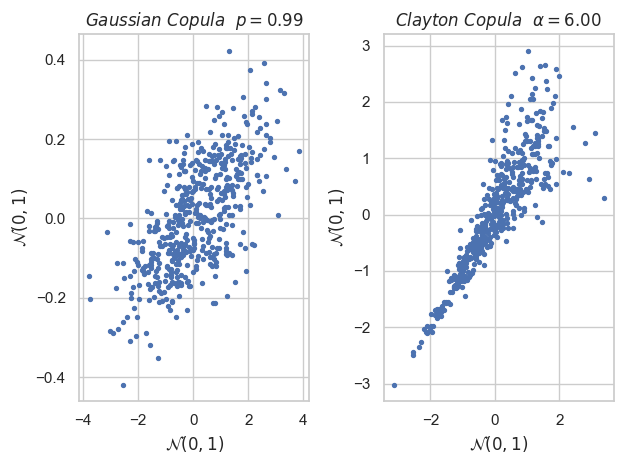

In [8]:
# Passage des uniforms vers des marges gaussiennes via l'inverse CDF (ppf)
H1 = np.empty_like(U_Gauss)
H2 = np.empty_like(U_Clayton)
H1[:,0] = norm.ppf(U_Gauss[:,0]); H1[:,1] = norm.ppf(U_Gauss[:,1])
H2[:,0] = norm.ppf(U_Clayton[:,0]); H2[:,1] = norm.ppf(U_Clayton[:,1])

plt.figure()

# Nuage pour la copule gaussienne (marges ~ N(0,1))
plt.subplot(1,2,1)
plt.scatter(H1[:,0], H1[:,1], s=8)
plt.xlabel('$\\mathcal{N}(0,1)$')
plt.ylabel('$\\mathcal{N}(0,1)$')
plt.title('$Gaussian\\ Copula\\ \\ p=%0.02f$' % (P[0,1],))

# Nuage pour la copule de Clayton (marges ~ N(0,1))
plt.subplot(1,2,2)
plt.scatter(H2[:,0], H2[:,1], s=8)
plt.xlabel('$\\mathcal{N}(0,1)$')
plt.ylabel('$\\mathcal{N}(0,1)$')
plt.title('$Clayton\\ Copula\\ \\ \\alpha=%0.02f$' % (alpha,))

plt.tight_layout()
plt.show()



- Application de $( \Phi^{-1})$ pour obtenir des marges gaussiennes à partir des uniforms.
- Visualisation de la structure de dépendance : gaussienne (corrélation forte) vs Clayton (queue inférieure).


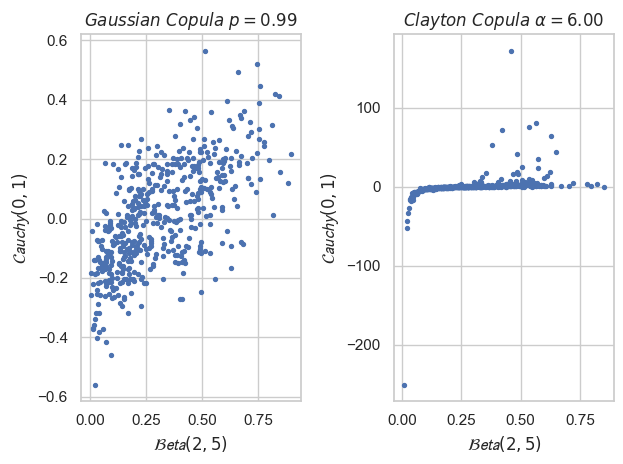

In [9]:
# Passage des uniforms vers des marges hétérogènes : Beta(2,5) et Cauchy(0,1)
H1 = np.empty_like(U_Gauss)
H2 = np.empty_like(U_Clayton)
H1[:,0] = beta.ppf(U_Gauss[:,0], 2, 5); H1[:,1] = cauchy.ppf(U_Gauss[:,1])
H2[:,0] = beta.ppf(U_Clayton[:,0], 2, 5); H2[:,1] = cauchy.ppf(U_Clayton[:,1])

plt.figure()

# Nuage de points pour la copule gaussienne avec marges Beta et Cauchy
plt.subplot(1,2,1)
plt.scatter(H1[:,0], H1[:,1], s=8)
plt.xlabel('$\\mathcal{Beta}(2,5)$')
plt.ylabel('$\\mathcal{Cauchy}(0,1)$')
plt.title('$Gaussian\\ Copula\\  p=%0.02f$' % (P[0,1],))

# Nuage de points pour la copule de Clayton avec marges Beta et Cauchy
plt.subplot(1,2,2)
plt.scatter(H2[:,0], H2[:,1], s=8)
plt.xlabel('$\\mathcal{Beta}(2,5)$')
plt.ylabel('$\\mathcal{Cauchy}(0,1)$')
plt.title('$Clayton\\ Copula\\  \\alpha=%0.02f$' % (alpha,))

plt.tight_layout()
plt.show()



- Transformation des uniforms en marges non gaussiennes : $(\mathrm{Beta}(2,5))$ pour $X$ et $(\mathrm{Cauchy}(0,1))$ pour $Y$.
- Illustration de la même structure de dépendance (gaussienne ou Clayton) mais avec des distributions marginales différentes.
